## Import Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("data/titanic.csv")
print("df datatype & shape :", type(df), df.shape)
df.head(10)

df datatype & shape : <class 'pandas.core.frame.DataFrame'> (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Remove `PassengerId`, `Name`, `Ticket`, `Cabin` columns from the dataset

In [3]:
print("df datatype & shape :", type(df), df.shape)
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

print("df datatype & shape :", type(df), df.shape)
df.head(10)

df datatype & shape : <class 'pandas.core.frame.DataFrame'> (891, 12)
df datatype & shape : <class 'pandas.core.frame.DataFrame'> (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## Preprocessing 

* No EDA? What a shame!
* Split the dataset by $X$ and $y$

In [4]:
# Survived
# Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

y = df.loc[:,"Survived"]

features_list = ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]
X = df.loc[:,features_list]

Split the data in `train` and `test` sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y) # Allows to stratify our sample.
                                                                # Meaning, we will have the same
                                                                # proportion of categories in test
                                                                # and train set

Deal with missing values with `SimpleImputer`

In [6]:
X_train.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [7]:
# Create an imputer for numerical columns
numerical_imputer = SimpleImputer(strategy="mean")

# Apply it on "Age" column.
# ! See the X[["Age"]] to get a 2D array rather than 1D
X_train[["Age"]] = numerical_imputer.fit_transform(X_train[["Age"]])

# In col `Embarked` replace missing val with "Unknown"
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
X_train[["Embarked"]] = categorical_imputer.fit_transform(X_train[["Embarked"]])

In [8]:
X_train.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

Make all the required preprocessing on the train set

In [9]:
print(X_train.head())

# Reminder, we have : ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]
numeric_features = [0, 2, 3, 4, 5]
numeric_transformer = StandardScaler()

categorical_features = [1, 6]
categorical_transformer = OneHotEncoder()

# No change in score with or without drop=first
# TODO: I think it's better without because in `LogisticRegression` there is an l2-type regulation/penalty
# categorical_transformer = OneHotEncoder(drop="first")

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:].round(2)) # print first 5 rows (not using iloc since now X_train became a numpy array)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
502       3  female  29.469823      0      0   7.6292        Q
464       3    male  29.469823      0      0   8.0500        S
198       3  female  29.469823      0      0   7.7500        Q
765       1  female  51.000000      1      0  77.9583        S
421       3    male  21.000000      0      0   7.7333        Q
[[ 1.    0.    0.    1.    0.    0.    0.83  0.   -0.49 -0.47 -0.48]
 [ 0.    1.    0.    0.    1.    0.    0.83  0.   -0.49 -0.47 -0.47]
 [ 1.    0.    0.    1.    0.    0.    0.83  0.   -0.49 -0.47 -0.48]
 [ 1.    0.    0.    0.    1.    0.   -1.56  1.68  0.46 -0.47  0.85]
 [ 0.    1.    0.    1.    0.    0.    0.83 -0.66 -0.49 -0.47 -0.48]]


## Build the model

Logistic Regression model

In [10]:
classifier = LogisticRegression(random_state = 0) # Instantiate model
classifier.fit(X_train, y_train)                  # Fit model. Ajustement

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [11]:
y_train_pred = classifier.predict(X_train)
print(f"\n\ny_train predictions head: {y_train_pred[0:5]}")



y_train predictions head: [1 0 1 1 0]


Evaluate the model but preprocess `X_test` first

In [12]:
X_test[["Age"]] = numerical_imputer.transform(X_test[["Age"]])
X_test[["Embarked"]] = categorical_imputer.transform(X_test[["Embarked"]])
X_test = feature_encoder.transform(X_test)

y_test_pred = classifier.predict(X_test)
print(f"y_test predictions head: {y_test_pred[0:5]}")


y_test predictions head: [0 0 0 0 1]


Create the confusion matrix with `plot_confusion_matrix`

Accuracy-score on train set : 0.803


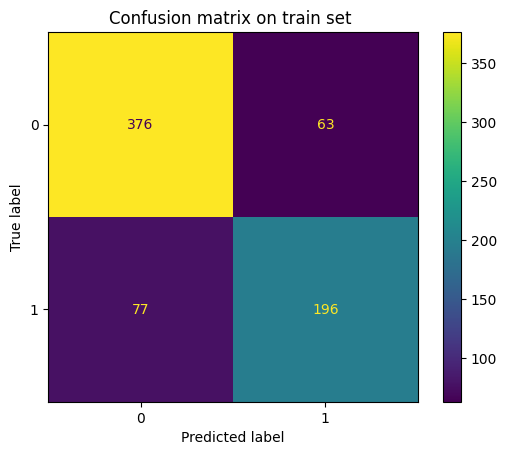

In [13]:
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ")

print(f"Accuracy-score on train set : {classifier.score(X_train, y_train):.3f}")

Accuracy-score on test set : 0.788


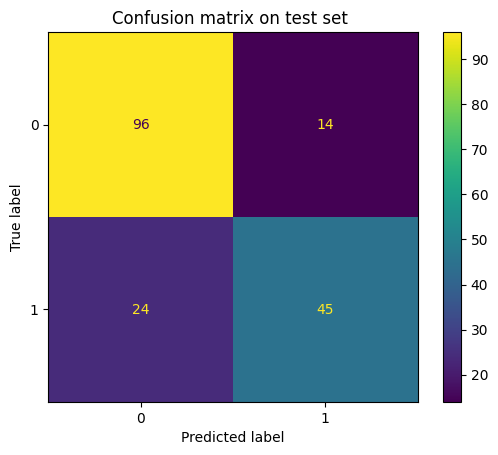

In [14]:
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ")

print(f"Accuracy-score on test set : {classifier.score(X_test, y_test):.3f}")